# Resnet

Resnet paper: https://arxiv.org/abs/1512.03385

Goal: implement a resnet for MNIST dataset.

References:

- https://flax.readthedocs.io/en/latest/mnist_tutorial.html

## Load in the MNIST Data

In [2]:
import tensorflow_datasets as tfds
import tensorflow as tf

tf.random.set_seed(0)

train_steps = 1200
eval_every = 200
batch_size = 32

train_ds = tfds.load("mnist", split="train")
test_ds = tfds.load("mnist", split="test")

def preprocess(ds, shuffle=False):
  normalize = lambda x: { "image": tf.cast(x["image"], tf.float32) / 255., "label": x["label"] }
  ds = ds.map(normalize)
  if shuffle:
    ds = ds.repeat().shuffle(1024)
  return ds

train_ds = preprocess(train_ds, shuffle=True)
train_ds = train_ds.batch(batch_size, drop_remainder=True).take(train_steps).prefetch(1)

test_ds = preprocess(test_ds)
test_ds = test_ds.batch(batch_size, drop_remainder=True).prefetch(1)

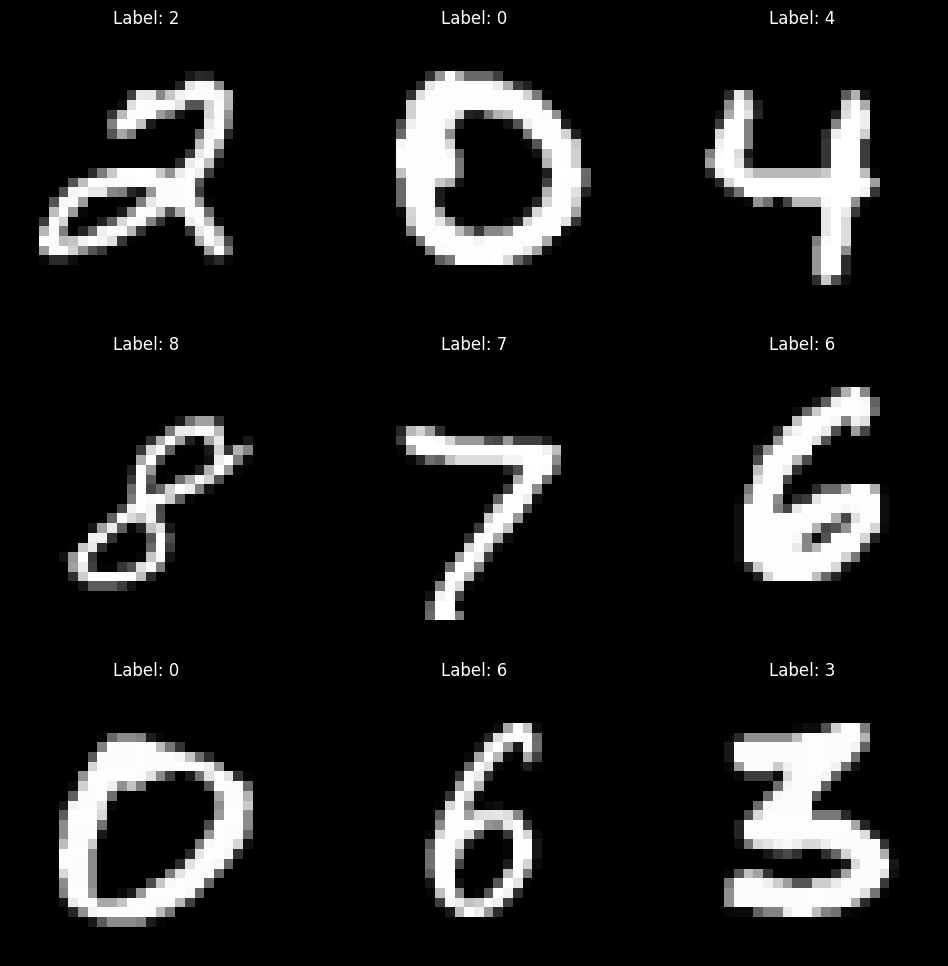

In [28]:
import matplotlib.pyplot as plt
plt.style.use("dark_background")

def view_batch(batch, rows=5, cols=5):
  fig, axs = plt.subplots(rows, cols, figsize=(12, 12))
  for i, ax in enumerate(axs.flat):
    ax.imshow(batch["image"][i], cmap="gray")
    ax.set_title(f"Label: {batch['label'][i]}")
    ax.axis('off')



view_batch(test_ds.as_numpy_iterator().next(), rows=3, cols=3)